In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as pp

In [4]:
nrows = 60000

In [5]:
!ls

accuracies.csv	ml-knn.ipynb	    ml-nene.ipynb   mnist_train.csv
lost+found	ml-nene-dumb.ipynb  mnist_test.csv


In [6]:
mnist_test = pd.read_csv('./mnist_test.csv', header=None)

In [7]:
mnist_train = pd.read_csv('./mnist_train.csv', header=None, nrows=nrows)

In [8]:
cnames = ["label"] + ['px_%s.%s' % (x,y) for x in range(28) for y in range(28)]

In [9]:
mnist_train.columns = cnames

In [10]:
mnist_test.columns = cnames

In [11]:
image_size = 28

In [12]:
label_train = mnist_train['label'].values

In [13]:
label_train.shape

(60000,)

In [14]:
label_test = mnist_test['label'].values

In [15]:
label_test.shape

(10000,)

In [16]:
image_train = mnist_train.values[:, 1:]

In [17]:
image_train.shape

(60000, 784)

In [18]:
image_test = mnist_test.values[:, 1:]

In [19]:
image_test.shape

(10000, 784)

In [20]:
image_train = image_train.reshape(nrows, 28, 28)

In [21]:
image_test = image_test.reshape(10000, 28, 28)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
lines_train = image_train.reshape(nrows, 784)

In [24]:
lines_test = image_test.reshape(10000, 784)

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
activations = [ 'identity', 'logistic', 'tanh', 'relu']

In [27]:
def hls_single(value):
    return (value,)

def hls_double(value):
    return (value, value)

def hls_triple(value):
    return (value, value, value)

def hls_bisect(value):
    return (value, value // 2, value // 4, value // 8)

def hls_stairs(value):
    return (value, 3 * value // 4, 2 * value // 4, 1 * value // 4)

In [28]:
hlss = {
    'single': hls_single,
    'double': hls_double,
    'triple': hls_triple,
    'bisect': hls_bisect,
    'stairs': hls_stairs,
}

In [29]:
def try_activations(ranges, hlsf):
    ranges = list(ranges)
    accuracies = np.zeros((len(ranges), len(activations)))
    
    for i, factor in enumerate(ranges):
        hls = hlsf(factor)
        
        for j, activation in enumerate(activations):
            print(f'run: {activation} @ {hls}')
            mlpc = MLPClassifier(activation=activation, random_state=0, hidden_layer_sizes=hls)
            %time mlpc = mlpc.fit(lines_train, label_train)

            pp.plot(range(mlpc.n_iter_), mlpc.loss_curve_)
            pp.show()
            print()

            preds_test = mlpc.predict(lines_test)

            accuracies[i, j] = accuracy_score(label_test, preds_test)
            print(accuracies[i, j])
            print()


        #print (f'hidden layer sizes: {hls}')
        #pp.bar(activations, accuracies[i, :])
        #pp.show()
        
    #print(f'per-activation effectiveness')

    #str_ranges = [str(factor) for factor in ranges]
    #for j, activation in enumerate(activations):
    #    print(f'activation: {activation}')
    #    pp.bar(str_ranges, accuracies[:, j])
    #    pp.show()
        
    return accuracies

In [30]:
factors = list(range(800, 0, -100))

run: identity @ (800,)
CPU times: user 13min 14s, sys: 24min 19s, total: 37min 33s
Wall time: 3min 22s


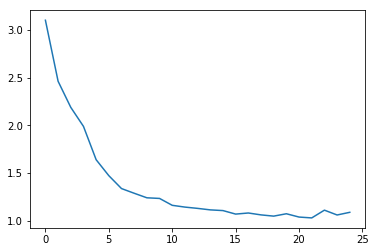


0.8684

run: logistic @ (800,)
CPU times: user 18min 49s, sys: 35min 39s, total: 54min 29s
Wall time: 3min 28s


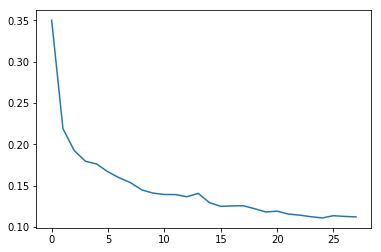


0.9609

run: tanh @ (800,)
CPU times: user 14min 13s, sys: 25min 11s, total: 39min 24s
Wall time: 2min 31s


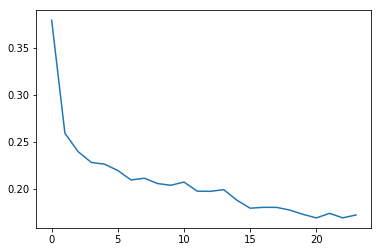


0.9445

run: relu @ (800,)
CPU times: user 4min 57s, sys: 8min 17s, total: 13min 14s
Wall time: 51.4 s


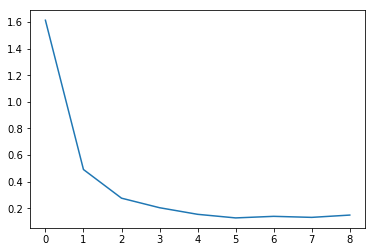


0.9658

run: identity @ (700,)
CPU times: user 13min 29s, sys: 28min 13s, total: 41min 42s
Wall time: 4min 44s


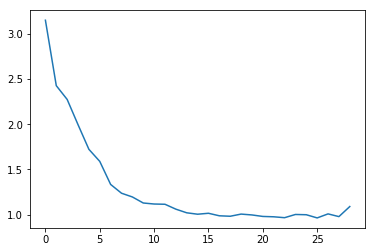


0.8807

run: logistic @ (700,)
CPU times: user 16min 16s, sys: 34min 35s, total: 50min 52s
Wall time: 4min 53s


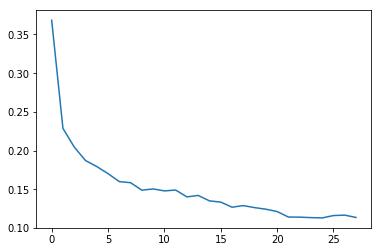


0.96

run: tanh @ (700,)
CPU times: user 13min 25s, sys: 24min, total: 37min 26s
Wall time: 2min 24s


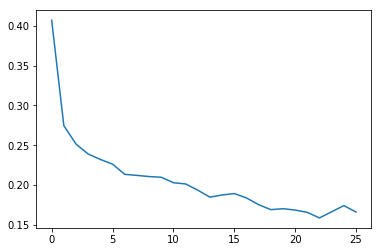


0.9491

run: relu @ (700,)
CPU times: user 8min 35s, sys: 14min 21s, total: 22min 57s
Wall time: 1min 28s


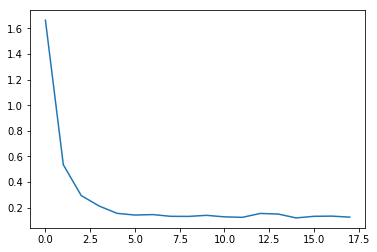


0.9714

run: identity @ (600,)
CPU times: user 10min 18s, sys: 16min 37s, total: 26min 55s
Wall time: 1min 44s


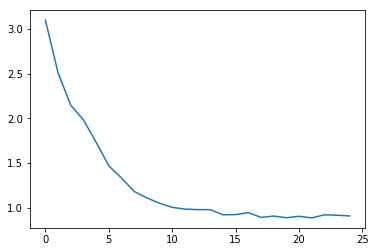


0.8626

run: logistic @ (600,)
CPU times: user 12min 18s, sys: 22min 42s, total: 35min
Wall time: 2min 14s


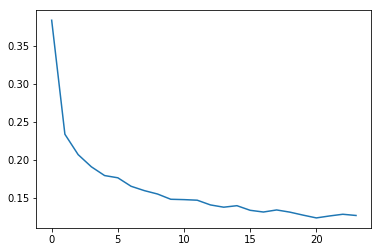


0.9569

run: tanh @ (600,)
CPU times: user 12min 5s, sys: 20min 46s, total: 32min 51s
Wall time: 2min 7s


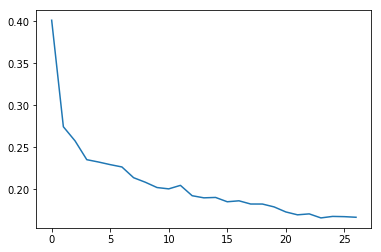


0.9492

run: relu @ (600,)
CPU times: user 5min 24s, sys: 8min 57s, total: 14min 22s
Wall time: 56.1 s


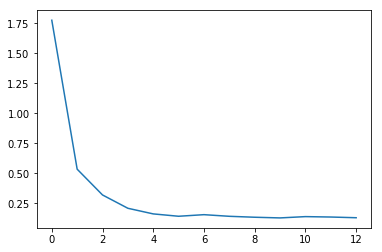


0.9667

run: identity @ (500,)
CPU times: user 8min 12s, sys: 12min 47s, total: 20min 59s
Wall time: 1min 22s


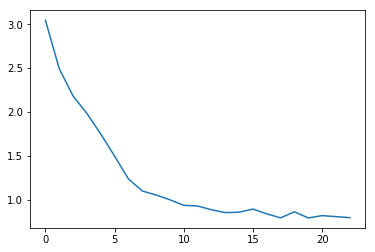


0.8679

run: logistic @ (500,)
CPU times: user 17min 7s, sys: 31min 21s, total: 48min 28s
Wall time: 3min 7s


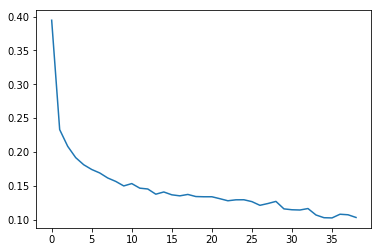


0.9602

run: tanh @ (500,)
CPU times: user 11min 8s, sys: 19min 3s, total: 30min 12s
Wall time: 1min 57s


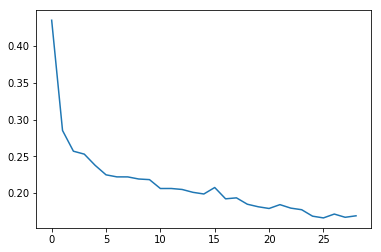


0.9477

run: relu @ (500,)
CPU times: user 9min 32s, sys: 15min 32s, total: 25min 5s
Wall time: 1min 37s


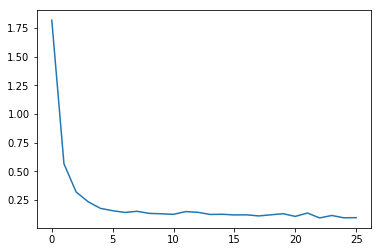


0.9728

run: identity @ (400,)
CPU times: user 7min 55s, sys: 12min 34s, total: 20min 29s
Wall time: 1min 20s


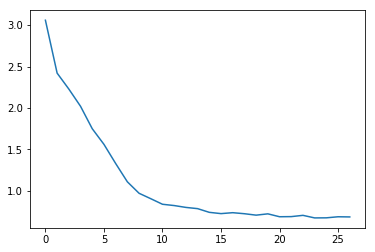


0.8826

run: logistic @ (400,)
CPU times: user 8min 59s, sys: 16min 30s, total: 25min 30s
Wall time: 1min 39s


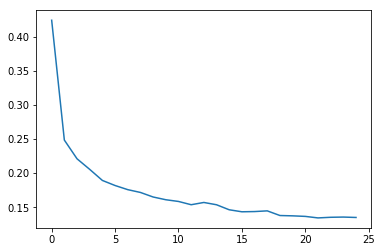


0.9545

run: tanh @ (400,)
CPU times: user 4min 6s, sys: 7min 1s, total: 11min 8s
Wall time: 44 s


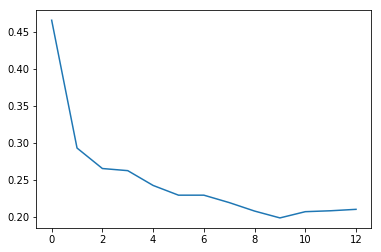


0.9424

run: relu @ (400,)
CPU times: user 5min 42s, sys: 9min 15s, total: 14min 58s
Wall time: 58.9 s


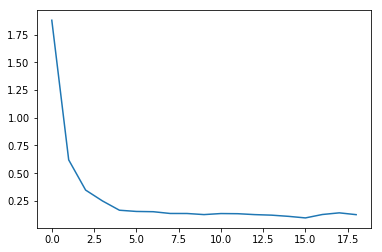


0.9674

run: identity @ (300,)
CPU times: user 7min 1s, sys: 10min 49s, total: 17min 51s
Wall time: 1min 10s


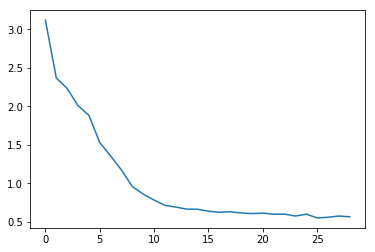


0.8988

run: logistic @ (300,)
CPU times: user 9min 57s, sys: 18min 8s, total: 28min 5s
Wall time: 1min 50s


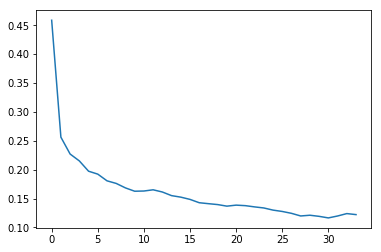


0.9573

run: tanh @ (300,)
CPU times: user 7min 3s, sys: 11min 43s, total: 18min 46s
Wall time: 1min 14s


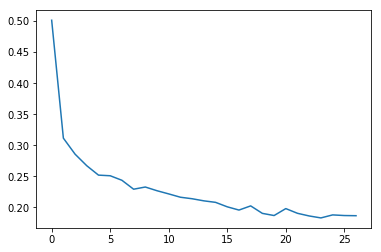


0.9452

run: relu @ (300,)
CPU times: user 4min 56s, sys: 8min 3s, total: 12min 59s
Wall time: 51.8 s


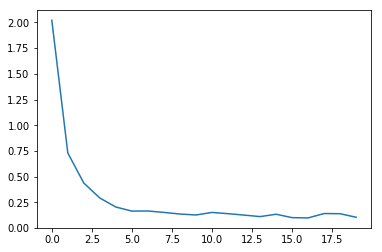


0.9686

run: identity @ (200,)
CPU times: user 3min 8s, sys: 5min 9s, total: 8min 17s
Wall time: 33.7 s


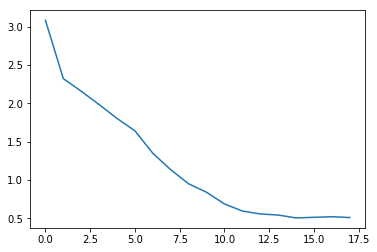


0.8873

run: logistic @ (200,)
CPU times: user 5min 1s, sys: 9min 24s, total: 14min 26s
Wall time: 57.5 s


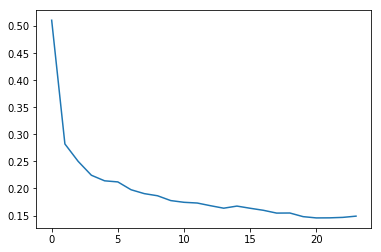


0.9504

run: tanh @ (200,)
CPU times: user 5min 6s, sys: 8min 53s, total: 13min 59s
Wall time: 56.2 s


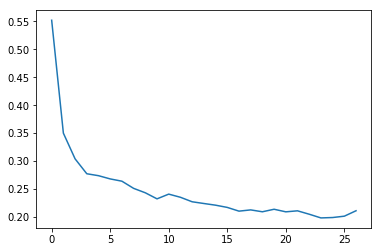


0.9357

run: relu @ (200,)
CPU times: user 3min 8s, sys: 5min 23s, total: 8min 31s
Wall time: 34.6 s


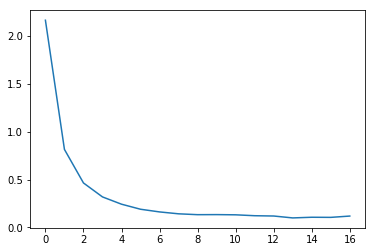


0.9688

run: identity @ (100,)
CPU times: user 2min 40s, sys: 4min 26s, total: 7min 7s
Wall time: 29.8 s


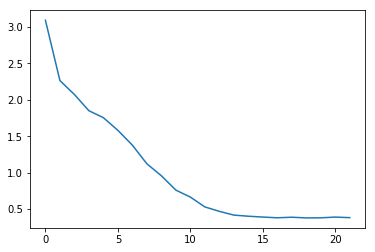


0.8962

run: logistic @ (100,)
CPU times: user 3min 21s, sys: 6min 4s, total: 9min 26s
Wall time: 38.7 s


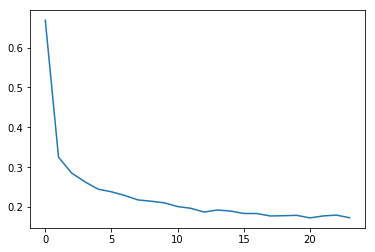


0.9429

run: tanh @ (100,)
CPU times: user 3min 46s, sys: 6min 10s, total: 9min 57s
Wall time: 41.2 s


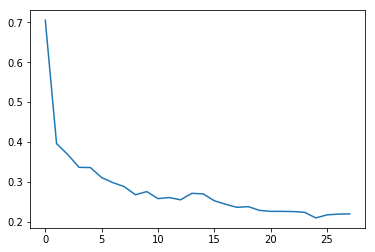


0.9298

run: relu @ (100,)
CPU times: user 3min 9s, sys: 5min 21s, total: 8min 30s
Wall time: 35.3 s


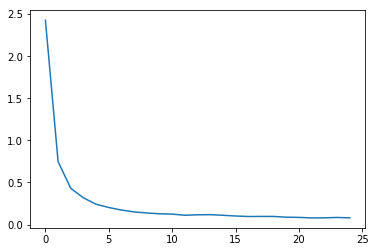


0.9559

run: identity @ (800, 800)
CPU times: user 16min 30s, sys: 23min 35s, total: 40min 5s
Wall time: 2min 32s


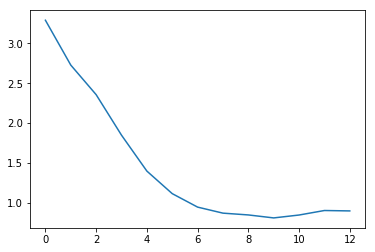


0.878

run: logistic @ (800, 800)
CPU times: user 1h 6min 5s, sys: 1h 49min 44s, total: 2h 55min 49s
Wall time: 11min 6s


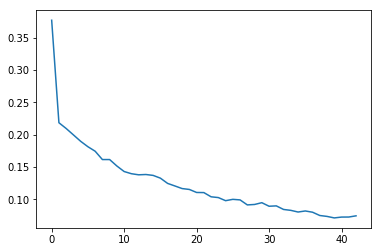


0.9678

run: tanh @ (800, 800)
CPU times: user 41min 59s, sys: 1h 11min, total: 1h 53min
Wall time: 7min 8s


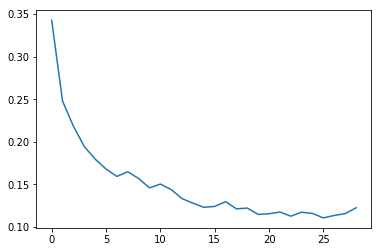


0.9597

run: relu @ (800, 800)
CPU times: user 17min 59s, sys: 26min 58s, total: 44min 58s
Wall time: 2min 51s


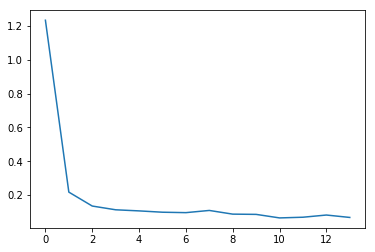


0.9672

run: identity @ (700, 700)
CPU times: user 13min 25s, sys: 19min 8s, total: 32min 34s
Wall time: 2min 4s


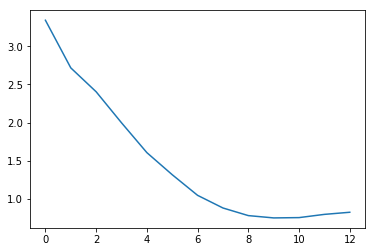


0.8685

run: logistic @ (700, 700)
CPU times: user 50min 23s, sys: 1h 25min 9s, total: 2h 15min 33s
Wall time: 8min 34s


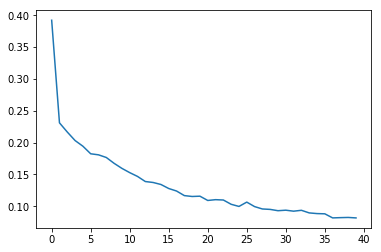


0.9645

run: tanh @ (700, 700)
CPU times: user 22min 25s, sys: 38min 15s, total: 1h 41s
Wall time: 3min 50s


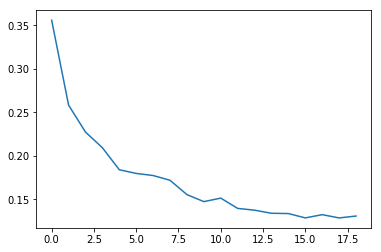


0.9593

run: relu @ (700, 700)
CPU times: user 17min 42s, sys: 27min 3s, total: 44min 45s
Wall time: 2min 50s


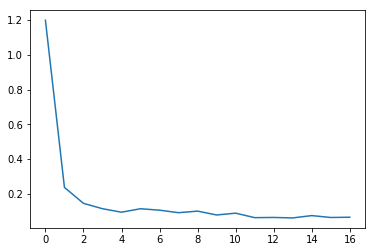


0.9702

run: identity @ (600, 600)
CPU times: user 11min 34s, sys: 16min 1s, total: 27min 36s
Wall time: 1min 45s


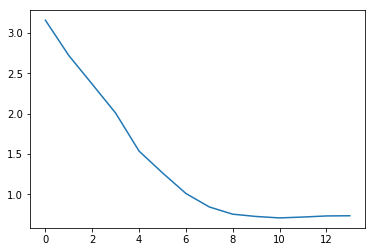


0.8905

run: logistic @ (600, 600)
CPU times: user 39min 52s, sys: 1h 6min 16s, total: 1h 46min 9s
Wall time: 6min 44s


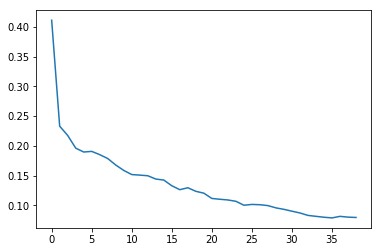


0.9681

run: tanh @ (600, 600)
CPU times: user 22min 3s, sys: 37min 4s, total: 59min 7s
Wall time: 3min 45s


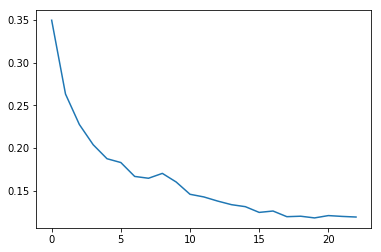


0.9598

run: relu @ (600, 600)
CPU times: user 21min 46s, sys: 32min 37s, total: 54min 24s
Wall time: 3min 28s


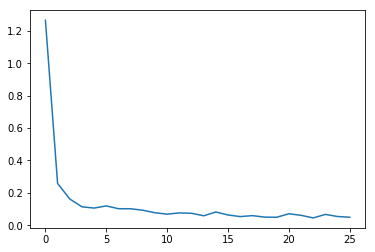


0.9682

run: identity @ (500, 500)
CPU times: user 9min 29s, sys: 13min 11s, total: 22min 40s
Wall time: 1min 27s


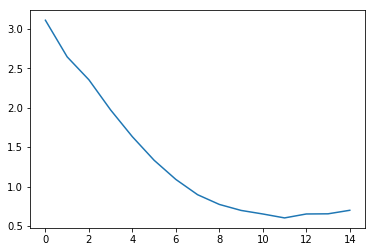


0.8836

run: logistic @ (500, 500)
CPU times: user 1h 46s, sys: 1h 48min 9s, total: 2h 48min 55s
Wall time: 10min 43s


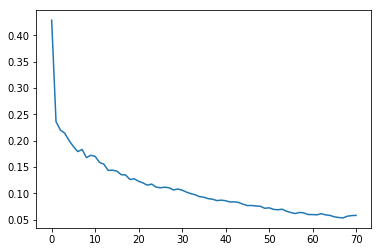


0.9714

run: tanh @ (500, 500)
CPU times: user 18min 10s, sys: 31min 3s, total: 49min 13s
Wall time: 3min 8s


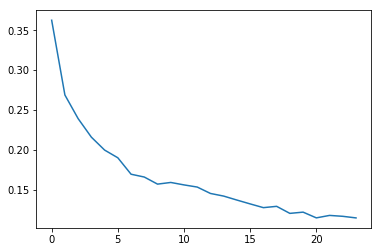


0.9631

run: relu @ (500, 500)
CPU times: user 12min 24s, sys: 18min 19s, total: 30min 43s
Wall time: 1min 58s


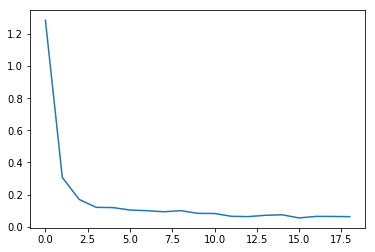


0.9736

run: identity @ (400, 400)
CPU times: user 7min 29s, sys: 10min 32s, total: 18min 1s
Wall time: 1min 10s


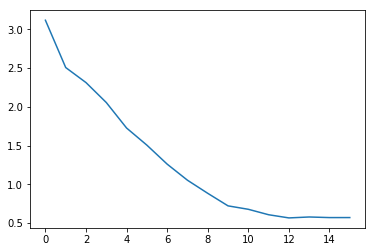


0.8725

run: logistic @ (400, 400)
CPU times: user 21min 22s, sys: 36min 27s, total: 57min 50s
Wall time: 3min 41s


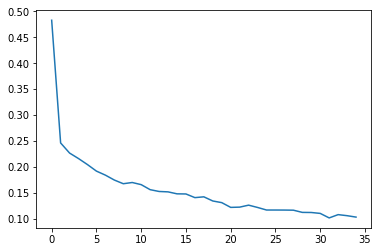


0.9605

run: tanh @ (400, 400)
CPU times: user 10min 46s, sys: 18min 20s, total: 29min 7s
Wall time: 1min 52s


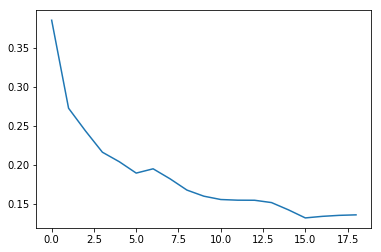


0.9541

run: relu @ (400, 400)
CPU times: user 4min 25s, sys: 6min 44s, total: 11min 9s
Wall time: 43.6 s


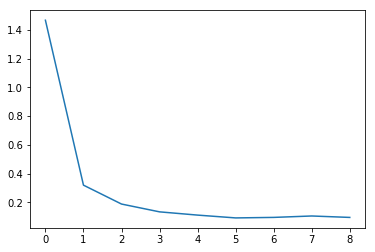


0.9624

run: identity @ (300, 300)
CPU times: user 6min 11s, sys: 8min 50s, total: 15min 2s
Wall time: 59 s


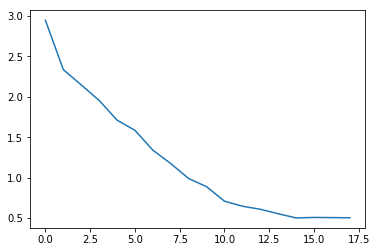


0.8775

run: logistic @ (300, 300)
CPU times: user 14min 1s, sys: 24min 17s, total: 38min 18s
Wall time: 2min 28s


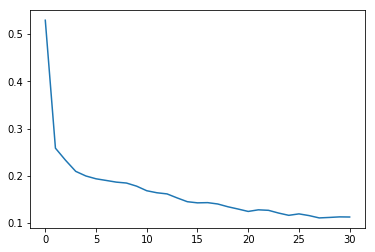


0.9615

run: tanh @ (300, 300)
CPU times: user 11min 32s, sys: 19min 47s, total: 31min 19s
Wall time: 2min 1s


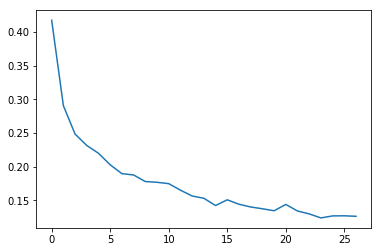


0.9511

run: relu @ (300, 300)
CPU times: user 4min 29s, sys: 6min 52s, total: 11min 21s
Wall time: 44.7 s


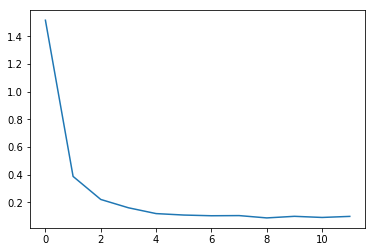


0.9671

run: identity @ (200, 200)
CPU times: user 13min 10s, sys: 21min 24s, total: 34min 34s
Wall time: 2min 17s


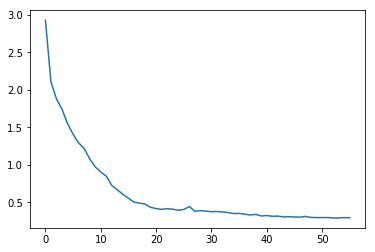


0.9133

run: logistic @ (200, 200)
CPU times: user 8min 47s, sys: 15min 46s, total: 24min 33s
Wall time: 1min 36s


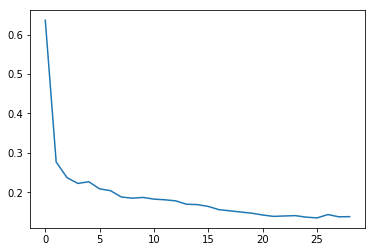


0.9518

run: tanh @ (200, 200)
CPU times: user 5min 18s, sys: 9min 43s, total: 15min 2s
Wall time: 59.2 s


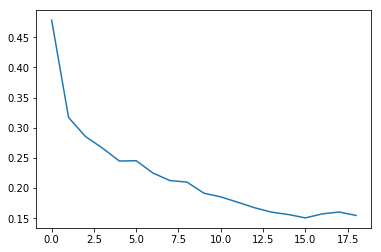


0.9539

run: relu @ (200, 200)
CPU times: user 5min 37s, sys: 9min 19s, total: 14min 57s
Wall time: 59.6 s


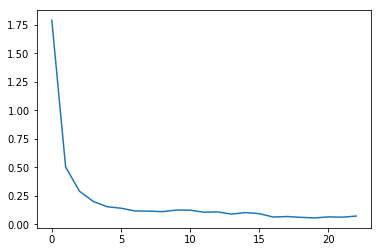


0.9645

run: identity @ (100, 100)
CPU times: user 9min 3s, sys: 14min 51s, total: 23min 55s
Wall time: 1min 37s


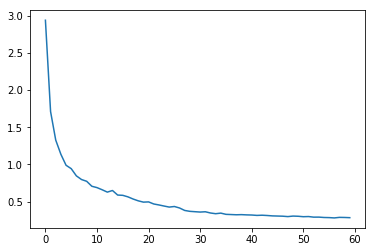


0.9164

run: logistic @ (100, 100)
CPU times: user 6min 17s, sys: 11min 31s, total: 17min 49s
Wall time: 1min 11s


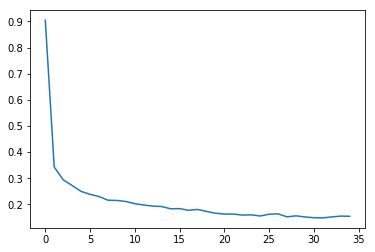


0.9493

run: tanh @ (100, 100)
CPU times: user 5min 49s, sys: 10min 16s, total: 16min 6s
Wall time: 1min 4s


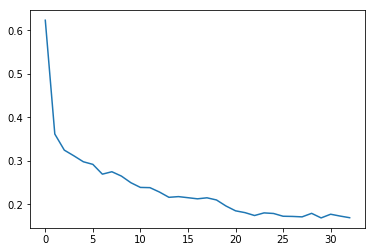


0.9398

run: relu @ (100, 100)
CPU times: user 4min 42s, sys: 7min 44s, total: 12min 26s
Wall time: 50.8 s


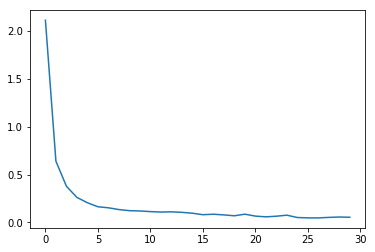


0.9678

run: identity @ (800, 800, 800)
CPU times: user 29min 49s, sys: 41min 14s, total: 1h 11min 3s
Wall time: 4min 29s


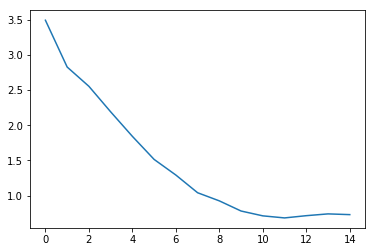


0.8549

run: logistic @ (800, 800, 800)
CPU times: user 2h 1min 55s, sys: 3h 21min 55s, total: 5h 23min 51s
Wall time: 20min 24s


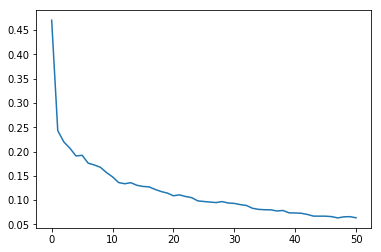


0.9692

run: tanh @ (800, 800, 800)
CPU times: user 32min 15s, sys: 53min 51s, total: 1h 26min 6s
Wall time: 5min 25s


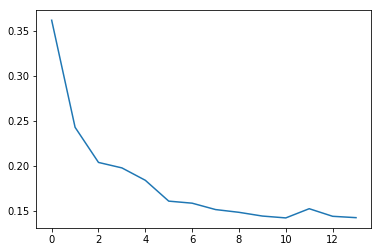


0.9582

run: relu @ (800, 800, 800)
CPU times: user 14min 11s, sys: 20min 56s, total: 35min 7s
Wall time: 2min 13s


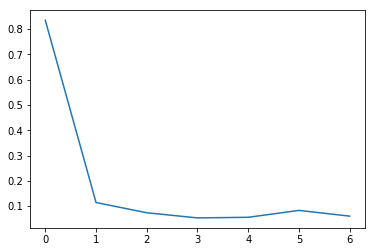


0.967

run: identity @ (700, 700, 700)
CPU times: user 20min 33s, sys: 28min 46s, total: 49min 20s
Wall time: 3min 7s


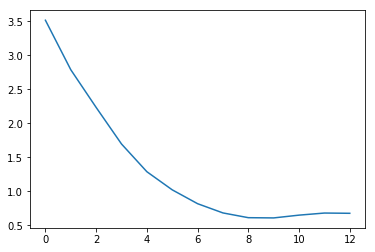


0.87

run: logistic @ (700, 700, 700)
CPU times: user 1h 43min 33s, sys: 2h 54min 29s, total: 4h 38min 3s
Wall time: 17min 32s


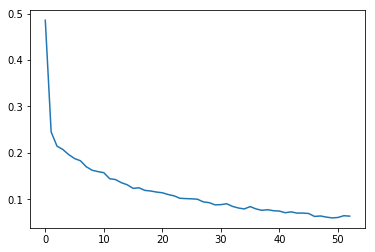


0.9693

run: tanh @ (700, 700, 700)
CPU times: user 22min 27s, sys: 38min 37s, total: 1h 1min 5s
Wall time: 3min 51s


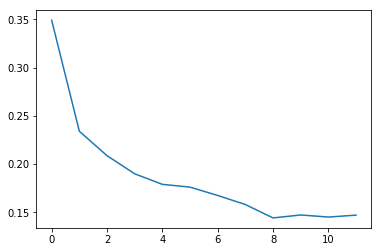


0.9536

run: relu @ (700, 700, 700)
CPU times: user 13min 11s, sys: 19min 58s, total: 33min 9s
Wall time: 2min 6s


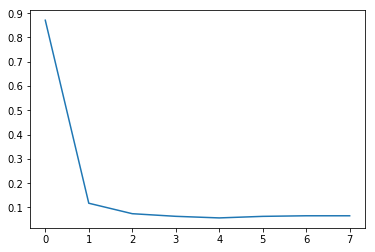


0.9641

run: identity @ (600, 600, 600)
CPU times: user 17min 35s, sys: 24min 9s, total: 41min 45s
Wall time: 2min 39s


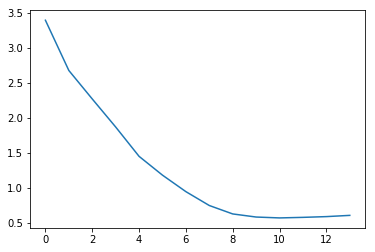


0.8778

run: logistic @ (600, 600, 600)
CPU times: user 47min 40s, sys: 1h 19min 34s, total: 2h 7min 15s
Wall time: 8min 2s


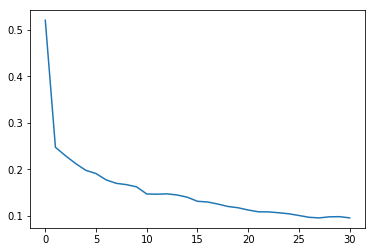


0.9644

run: tanh @ (600, 600, 600)
CPU times: user 31min 19s, sys: 53min 41s, total: 1h 25min 1s
Wall time: 5min 22s


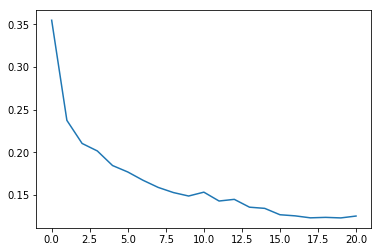


0.9569

run: relu @ (600, 600, 600)
CPU times: user 10min 24s, sys: 15min 34s, total: 25min 58s
Wall time: 1min 39s


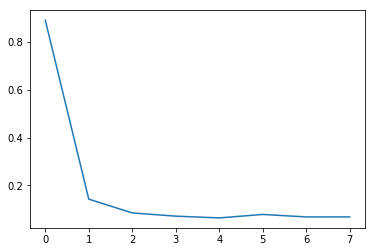


0.9631

run: identity @ (500, 500, 500)
CPU times: user 19min 39s, sys: 26min 59s, total: 46min 38s
Wall time: 2min 58s


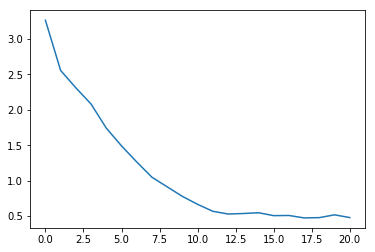


0.8807

run: logistic @ (500, 500, 500)
CPU times: user 1h 18min 44s, sys: 2h 15min 54s, total: 3h 34min 39s
Wall time: 13min 35s


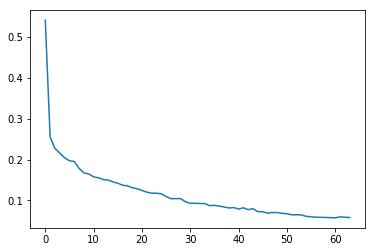


0.973

run: tanh @ (500, 500, 500)
CPU times: user 25min 24s, sys: 43min 55s, total: 1h 9min 20s
Wall time: 4min 23s


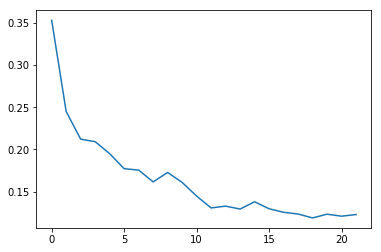


0.9557

run: relu @ (500, 500, 500)
CPU times: user 6min 49s, sys: 9min 59s, total: 16min 48s
Wall time: 1min 4s


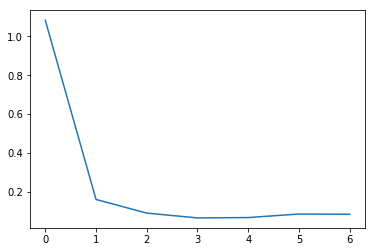


0.9532

run: identity @ (400, 400, 400)
CPU times: user 14min 28s, sys: 19min 21s, total: 33min 50s
Wall time: 2min 10s


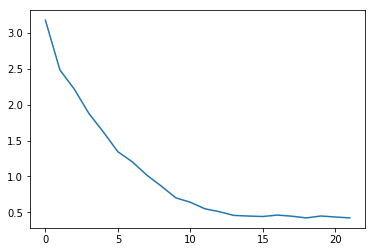


0.8988

run: logistic @ (400, 400, 400)
CPU times: user 47min 27s, sys: 1h 22min, total: 2h 9min 27s
Wall time: 8min 13s


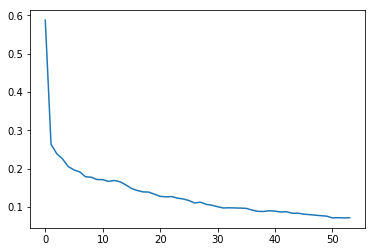


0.9662

run: tanh @ (400, 400, 400)
CPU times: user 24min 11s, sys: 42min 1s, total: 1h 6min 12s
Wall time: 4min 12s


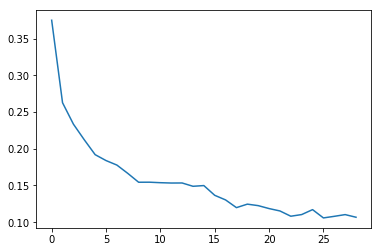


0.9559

run: relu @ (400, 400, 400)
CPU times: user 5min 37s, sys: 8min 10s, total: 13min 47s
Wall time: 53.2 s


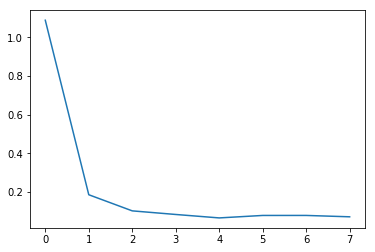


0.9545

run: identity @ (300, 300, 300)
CPU times: user 16min 42s, sys: 22min 11s, total: 38min 53s
Wall time: 2min 30s


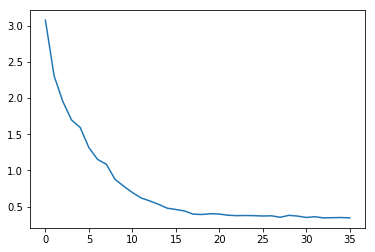


0.9007

run: logistic @ (300, 300, 300)
CPU times: user 48min 6s, sys: 1h 25min 13s, total: 2h 13min 19s
Wall time: 8min 30s


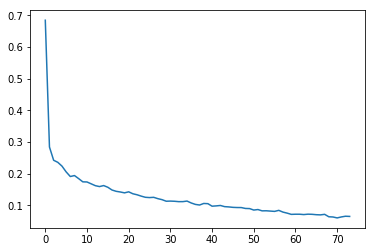


0.9695

run: tanh @ (300, 300, 300)
CPU times: user 13min 7s, sys: 22min 40s, total: 35min 48s
Wall time: 2min 17s


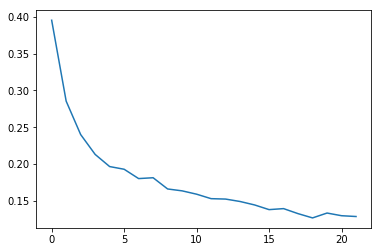


0.9578

run: relu @ (300, 300, 300)
CPU times: user 7min 56s, sys: 11min 31s, total: 19min 28s
Wall time: 1min 15s


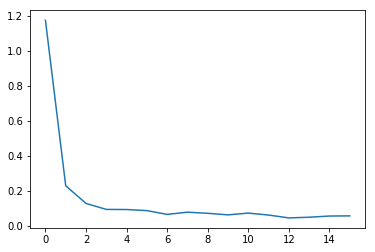


0.9704

run: identity @ (200, 200, 200)
CPU times: user 8min 50s, sys: 12min 59s, total: 21min 49s
Wall time: 1min 26s


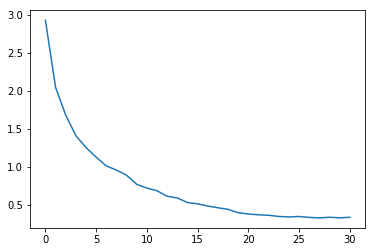


0.8927

run: logistic @ (200, 200, 200)
CPU times: user 6min 30s, sys: 11min 54s, total: 18min 25s
Wall time: 1min 11s


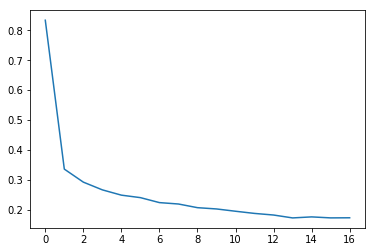


0.9466

run: tanh @ (200, 200, 200)
CPU times: user 11min 31s, sys: 21min 5s, total: 32min 37s
Wall time: 2min 6s


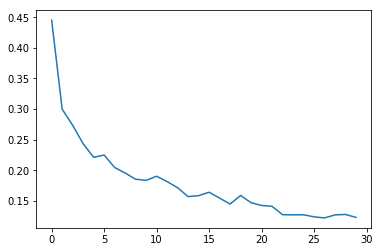


0.9554

run: relu @ (200, 200, 200)
CPU times: user 6min 44s, sys: 10min 52s, total: 17min 36s
Wall time: 1min 9s


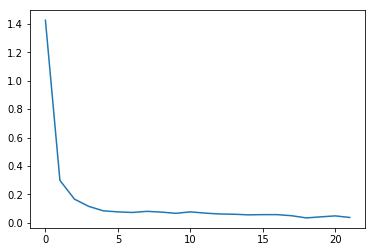


0.9739

run: identity @ (100, 100, 100)
CPU times: user 7min 49s, sys: 12min 15s, total: 20min 5s
Wall time: 1min 21s


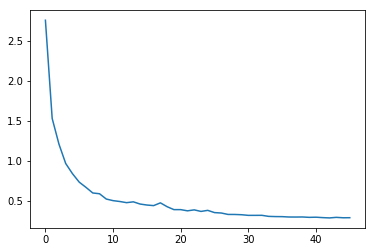


0.9145

run: logistic @ (100, 100, 100)
CPU times: user 3min 15s, sys: 6min 5s, total: 9min 20s
Wall time: 37.3 s


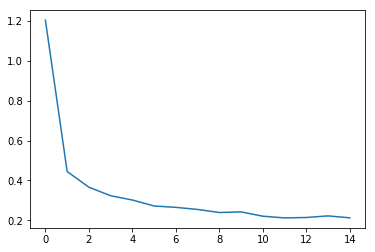


0.9331

run: tanh @ (100, 100, 100)
CPU times: user 3min 54s, sys: 7min 12s, total: 11min 7s
Wall time: 44.3 s


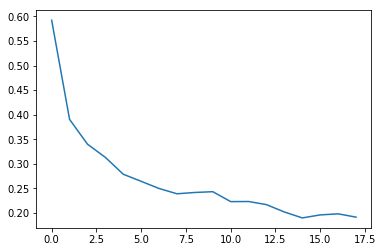


0.9355

run: relu @ (100, 100, 100)
CPU times: user 3min 21s, sys: 5min 26s, total: 8min 48s
Wall time: 35.6 s


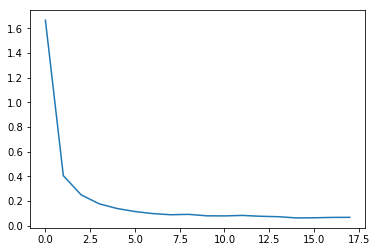


0.9597

run: identity @ (800, 400, 200, 100)
CPU times: user 12min 31s, sys: 17min 51s, total: 30min 23s
Wall time: 1min 56s


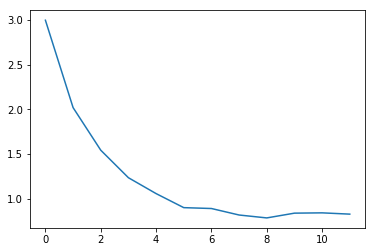


0.869

run: logistic @ (800, 400, 200, 100)
CPU times: user 58min 55s, sys: 1h 40min 38s, total: 2h 39min 33s
Wall time: 10min 5s


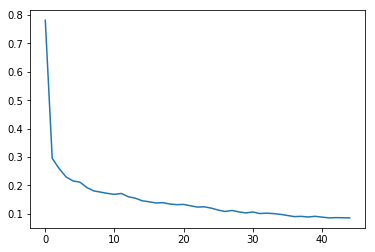


0.9634

run: tanh @ (800, 400, 200, 100)
CPU times: user 26min 55s, sys: 45min 44s, total: 1h 12min 39s
Wall time: 4min 36s


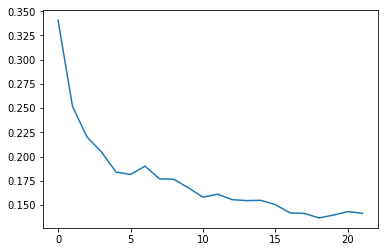


0.9482

run: relu @ (800, 400, 200, 100)
CPU times: user 9min 54s, sys: 15min 7s, total: 25min 1s
Wall time: 1min 35s


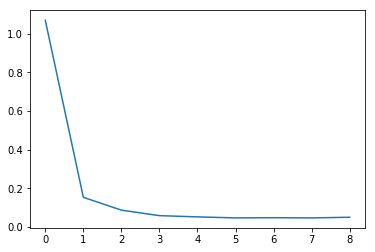


0.9662

run: identity @ (700, 350, 175, 87)
CPU times: user 37min 36s, sys: 53min 42s, total: 1h 31min 19s
Wall time: 5min 49s


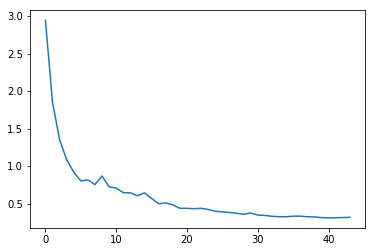


0.9101

run: logistic @ (700, 350, 175, 87)
CPU times: user 37min 26s, sys: 1h 4min 18s, total: 1h 41min 45s
Wall time: 6min 27s


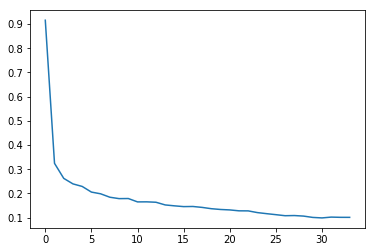


0.9633

run: tanh @ (700, 350, 175, 87)
CPU times: user 14min 26s, sys: 24min 50s, total: 39min 17s
Wall time: 2min 29s


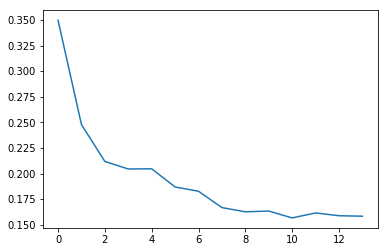


0.949

run: relu @ (700, 350, 175, 87)
CPU times: user 17min 15s, sys: 26min 10s, total: 43min 26s
Wall time: 2min 46s


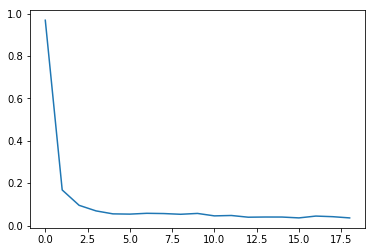


0.9752

run: identity @ (600, 300, 150, 75)
CPU times: user 10min 26s, sys: 14min 38s, total: 25min 5s
Wall time: 1min 36s


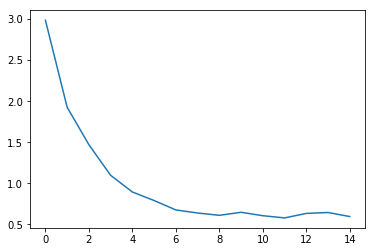


0.8824

run: logistic @ (600, 300, 150, 75)
CPU times: user 24min 20s, sys: 41min 9s, total: 1h 5min 29s
Wall time: 4min 9s


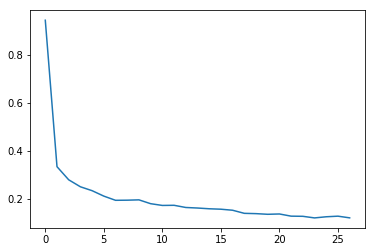


0.9589

run: tanh @ (600, 300, 150, 75)
CPU times: user 24min 37s, sys: 41min 38s, total: 1h 6min 16s
Wall time: 4min 13s


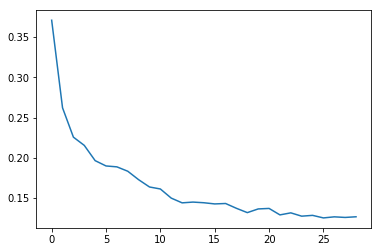


0.957

run: relu @ (600, 300, 150, 75)
CPU times: user 7min 25s, sys: 10min 59s, total: 18min 25s
Wall time: 1min 10s


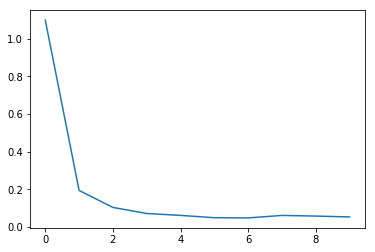


0.9673

run: identity @ (500, 250, 125, 62)
CPU times: user 7min 32s, sys: 11min 1s, total: 18min 34s
Wall time: 1min 11s


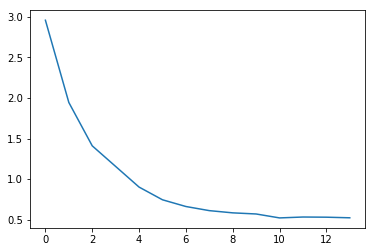


0.8794

run: logistic @ (500, 250, 125, 62)
CPU times: user 30min 47s, sys: 53min 27s, total: 1h 24min 15s
Wall time: 5min 22s


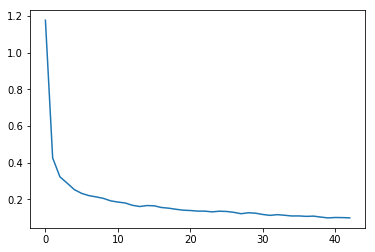


0.9636

run: tanh @ (500, 250, 125, 62)
CPU times: user 16min 1s, sys: 28min 11s, total: 44min 13s
Wall time: 2min 49s


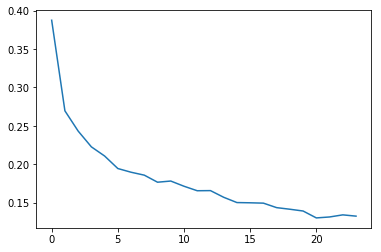


0.9551

run: relu @ (500, 250, 125, 62)
CPU times: user 5min 48s, sys: 9min 17s, total: 15min 5s
Wall time: 58.5 s


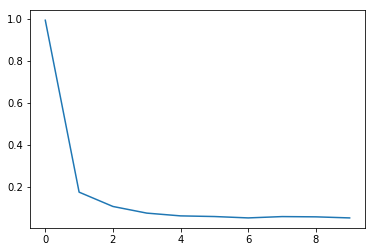


0.9675

run: identity @ (400, 200, 100, 50)
CPU times: user 29min 17s, sys: 44min 55s, total: 1h 14min 13s
Wall time: 4min 47s


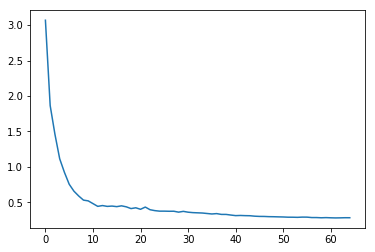


0.9141

run: logistic @ (400, 200, 100, 50)
CPU times: user 23min 52s, sys: 42min 26s, total: 1h 6min 19s
Wall time: 4min 15s


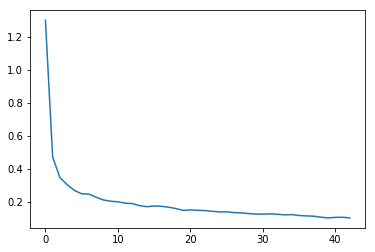


0.9583

run: tanh @ (400, 200, 100, 50)
CPU times: user 9min 18s, sys: 16min 5s, total: 25min 23s
Wall time: 1min 37s


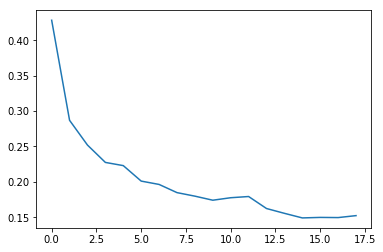


0.9448

run: relu @ (400, 200, 100, 50)
CPU times: user 7min 39s, sys: 12min 11s, total: 19min 51s
Wall time: 1min 17s


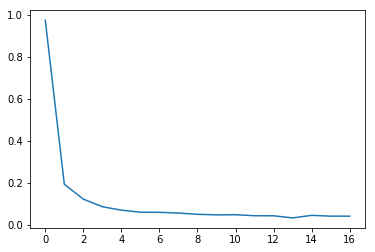


0.9657

run: identity @ (300, 150, 75, 37)
CPU times: user 19min 13s, sys: 29min 6s, total: 48min 20s
Wall time: 3min 9s


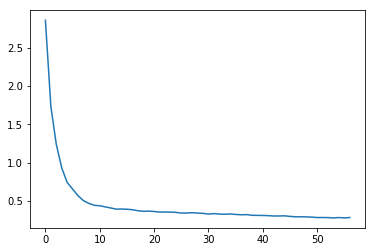


0.9099

run: logistic @ (300, 150, 75, 37)
CPU times: user 9min 44s, sys: 17min 2s, total: 26min 47s
Wall time: 1min 43s


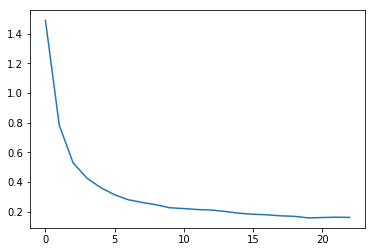


0.9498

run: tanh @ (300, 150, 75, 37)
CPU times: user 13min 34s, sys: 23min 32s, total: 37min 6s
Wall time: 2min 24s


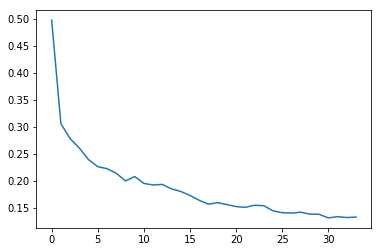


0.9502

run: relu @ (300, 150, 75, 37)
CPU times: user 5min 55s, sys: 9min 16s, total: 15min 11s
Wall time: 59.5 s


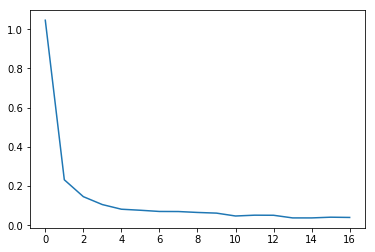


0.9679

run: identity @ (200, 100, 50, 25)
CPU times: user 5min 36s, sys: 9min 10s, total: 14min 47s
Wall time: 59.1 s


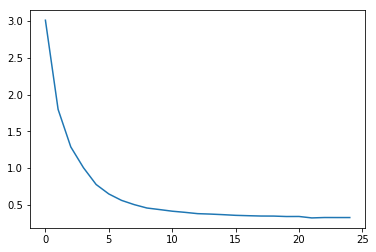


0.8938

run: logistic @ (200, 100, 50, 25)
CPU times: user 12min 50s, sys: 24min 8s, total: 36min 59s
Wall time: 2min 24s


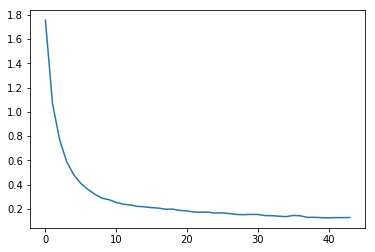


0.9503

run: tanh @ (200, 100, 50, 25)
CPU times: user 6min 5s, sys: 12min 3s, total: 18min 9s
Wall time: 1min 11s


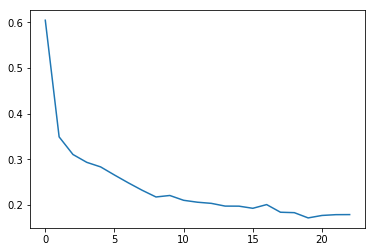


0.9424

run: relu @ (200, 100, 50, 25)
CPU times: user 7min 37s, sys: 13min 26s, total: 21min 4s
Wall time: 1min 23s


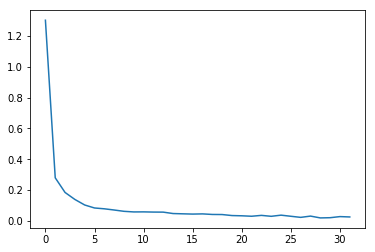


0.9725

run: identity @ (100, 50, 25, 12)
CPU times: user 4min 20s, sys: 7min 49s, total: 12min 9s
Wall time: 49.9 s


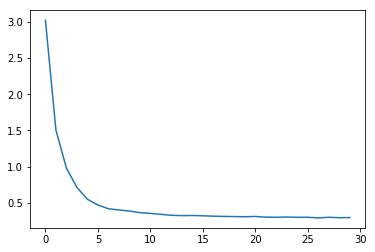


0.907

run: logistic @ (100, 50, 25, 12)
CPU times: user 5min 21s, sys: 10min 38s, total: 16min
Wall time: 1min 4s


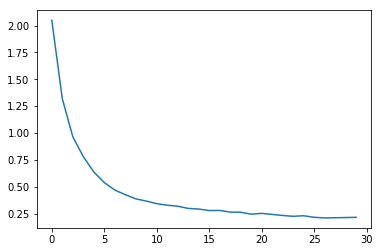


0.9315

run: tanh @ (100, 50, 25, 12)
CPU times: user 4min 5s, sys: 8min, total: 12min 5s
Wall time: 48.8 s


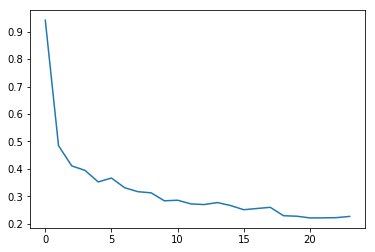


0.9274

run: relu @ (100, 50, 25, 12)
CPU times: user 4min 13s, sys: 7min 56s, total: 12min 9s
Wall time: 49.5 s


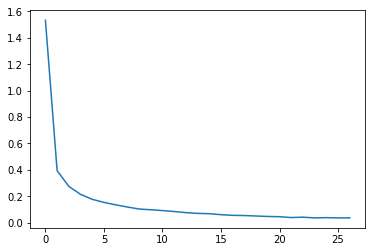


0.9653

run: identity @ (800, 600, 400, 200)
CPU times: user 40min 34s, sys: 56min 38s, total: 1h 37min 13s
Wall time: 6min 9s


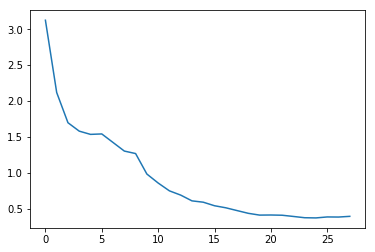


0.9029

run: logistic @ (800, 600, 400, 200)
CPU times: user 1h 18min 50s, sys: 2h 11min 2s, total: 3h 29min 53s
Wall time: 13min 14s


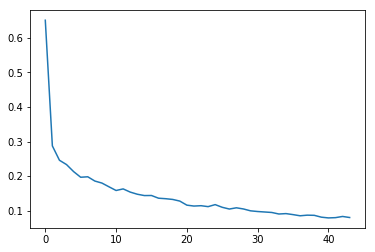


0.9644

run: tanh @ (800, 600, 400, 200)
CPU times: user 24min 9s, sys: 40min 39s, total: 1h 4min 49s
Wall time: 4min 5s


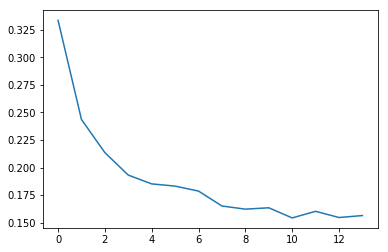


0.9488

run: relu @ (800, 600, 400, 200)
CPU times: user 12min 10s, sys: 18min 16s, total: 30min 26s
Wall time: 1min 55s


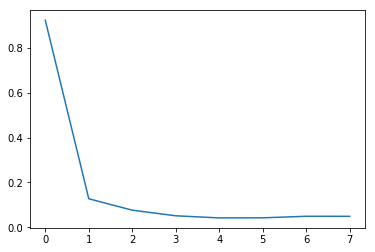


0.9728

run: identity @ (700, 525, 350, 175)
CPU times: user 39min 7s, sys: 54min 32s, total: 1h 33min 40s
Wall time: 5min 56s


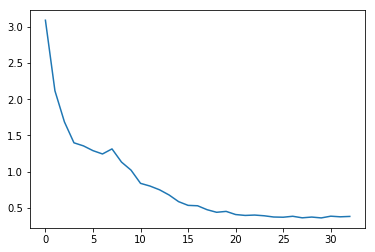


0.8989

run: logistic @ (700, 525, 350, 175)
CPU times: user 25min 17s, sys: 41min 53s, total: 1h 7min 11s
Wall time: 4min 14s


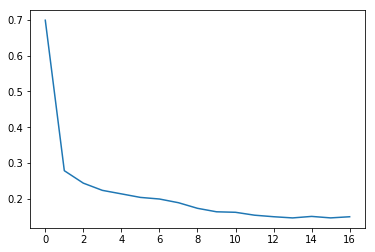


0.9495

run: tanh @ (700, 525, 350, 175)
CPU times: user 31min 34s, sys: 53min 18s, total: 1h 24min 53s
Wall time: 5min 22s


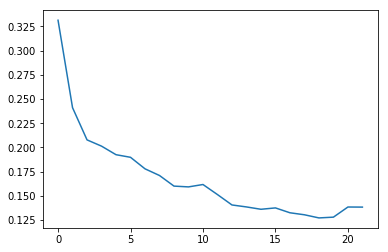


0.9488

run: relu @ (700, 525, 350, 175)
CPU times: user 10min, sys: 15min 1s, total: 25min 2s
Wall time: 1min 35s


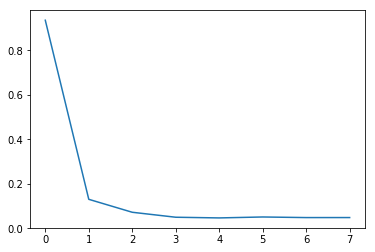


0.9638

run: identity @ (600, 450, 300, 150)
CPU times: user 32min 33s, sys: 45min 24s, total: 1h 17min 58s
Wall time: 4min 57s


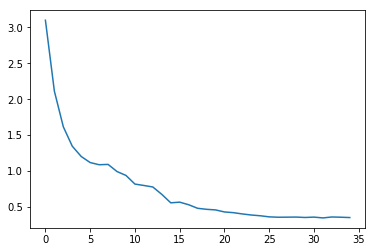


0.8865

run: logistic @ (600, 450, 300, 150)
CPU times: user 50min 11s, sys: 1h 24min 51s, total: 2h 15min 2s
Wall time: 8min 33s


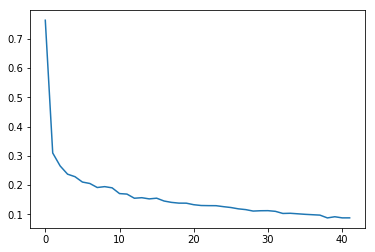


0.9621

run: tanh @ (600, 450, 300, 150)
CPU times: user 26min 31s, sys: 45min 27s, total: 1h 11min 58s
Wall time: 4min 33s


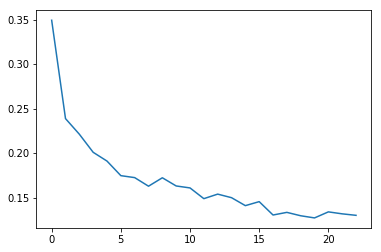


0.9528

run: relu @ (600, 450, 300, 150)
CPU times: user 14min 52s, sys: 22min 7s, total: 36min 59s
Wall time: 2min 21s


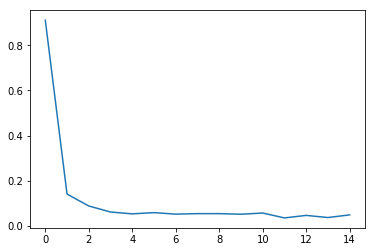


0.9697

run: identity @ (500, 375, 250, 125)
CPU times: user 25min 55s, sys: 36min 31s, total: 1h 2min 27s
Wall time: 3min 59s


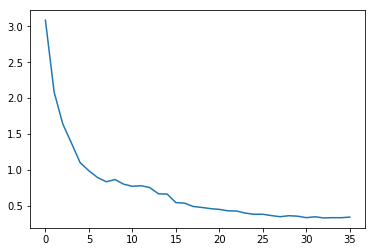


0.9018

run: logistic @ (500, 375, 250, 125)
CPU times: user 34min 38s, sys: 58min 39s, total: 1h 33min 17s
Wall time: 5min 55s


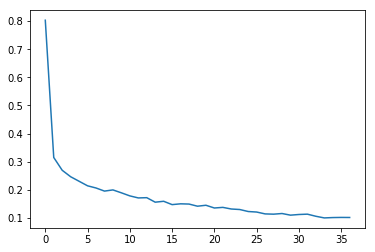


0.9634

run: tanh @ (500, 375, 250, 125)
CPU times: user 33min 57s, sys: 59min 2s, total: 1h 33min
Wall time: 5min 54s


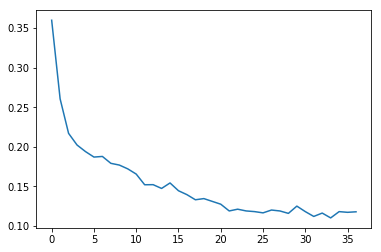


0.9521

run: relu @ (500, 375, 250, 125)
CPU times: user 7min 50s, sys: 11min 38s, total: 19min 28s
Wall time: 1min 14s


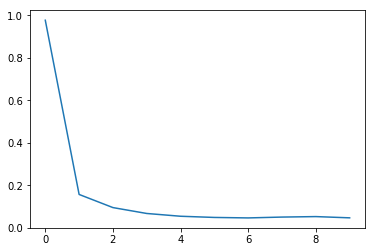


0.9628

run: identity @ (400, 300, 200, 100)
CPU times: user 30min 32s, sys: 43min 30s, total: 1h 14min 2s
Wall time: 4min 45s


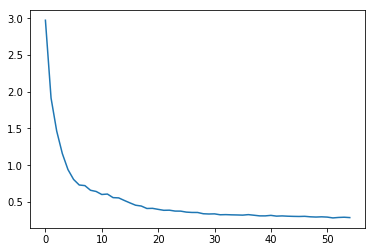


0.9152

run: logistic @ (400, 300, 200, 100)
CPU times: user 31min 14s, sys: 53min 40s, total: 1h 24min 54s
Wall time: 5min 25s


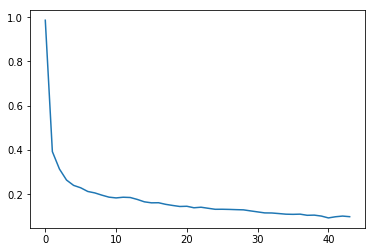


0.9642

run: tanh @ (400, 300, 200, 100)
CPU times: user 13min 5s, sys: 22min 35s, total: 35min 40s
Wall time: 2min 16s


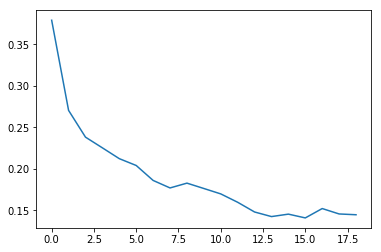


0.9449

run: relu @ (400, 300, 200, 100)
CPU times: user 6min 56s, sys: 10min 27s, total: 17min 24s
Wall time: 1min 7s


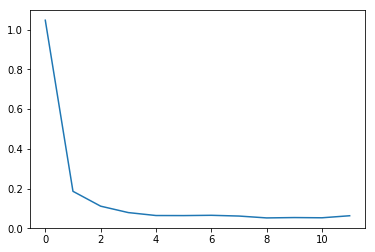


0.9649

run: identity @ (300, 225, 150, 75)
CPU times: user 10min 41s, sys: 15min 1s, total: 25min 42s
Wall time: 1min 40s


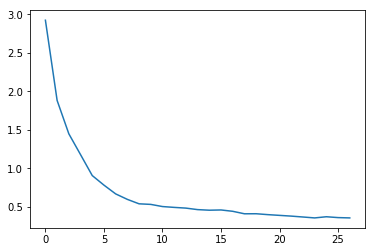


0.8937

run: logistic @ (300, 225, 150, 75)
CPU times: user 18min 49s, sys: 32min 38s, total: 51min 27s
Wall time: 3min 18s


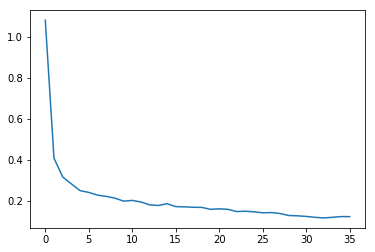


0.9574

run: tanh @ (300, 225, 150, 75)
CPU times: user 16min 18s, sys: 38min 44s, total: 55min 3s
Wall time: 6min 40s


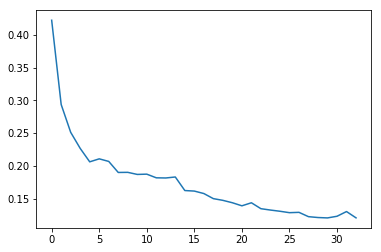


0.9537

run: relu @ (300, 225, 150, 75)
CPU times: user 7min 6s, sys: 15min 27s, total: 22min 34s
Wall time: 2min 51s


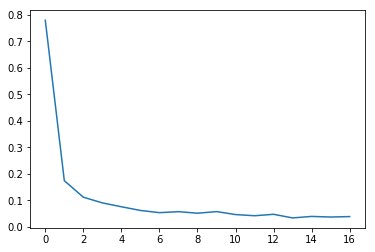


0.9704

run: identity @ (200, 150, 100, 50)
CPU times: user 13min 4s, sys: 28min 28s, total: 41min 33s
Wall time: 5min 18s


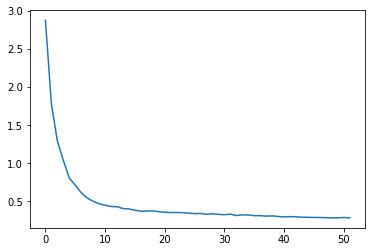


0.9075

run: logistic @ (200, 150, 100, 50)
CPU times: user 12min 54s, sys: 32min 23s, total: 45min 18s
Wall time: 5min 40s


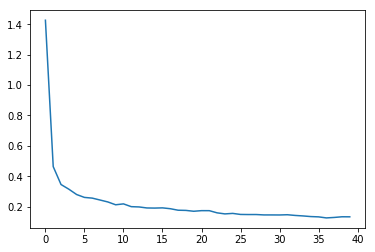


0.9522

run: tanh @ (200, 150, 100, 50)
CPU times: user 3min 53s, sys: 9min 37s, total: 13min 31s
Wall time: 1min 42s


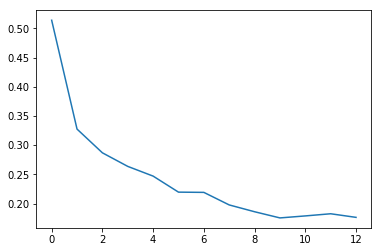


0.9445

run: relu @ (200, 150, 100, 50)
CPU times: user 7min 47s, sys: 16min 42s, total: 24min 29s
Wall time: 3min


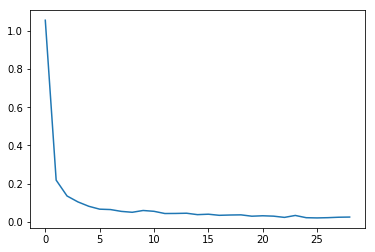


0.977

run: identity @ (100, 75, 50, 25)
CPU times: user 4min 44s, sys: 11min 34s, total: 16min 19s
Wall time: 2min 7s


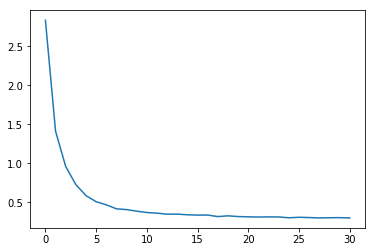


0.9086

run: logistic @ (100, 75, 50, 25)
CPU times: user 5min 13s, sys: 13min 28s, total: 18min 42s
Wall time: 2min 24s


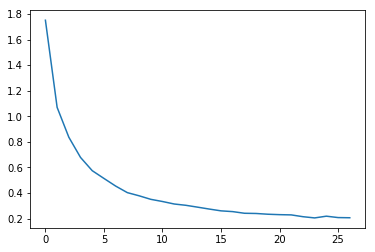


0.9384

run: tanh @ (100, 75, 50, 25)
CPU times: user 4min 38s, sys: 12min 4s, total: 16min 43s
Wall time: 2min 8s


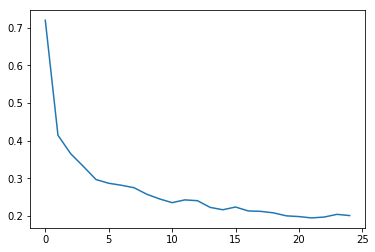


0.9333

run: relu @ (100, 75, 50, 25)
CPU times: user 5min 44s, sys: 14min 16s, total: 20min
Wall time: 2min 34s


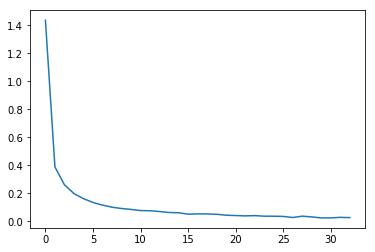


0.9692



In [ ]:
accuracies_per_hlsf = {}
for hlsf in hlss:
    accuracies_per_hlsf[hlsf] = try_activations(factors, hlss[hlsf])

In [38]:
accuracies_per_hlsf

{'single': array([[0.8684, 0.9609, 0.9445, 0.9658],
        [0.8807, 0.96  , 0.9491, 0.9714],
        [0.8626, 0.9569, 0.9492, 0.9667],
        [0.8679, 0.9602, 0.9477, 0.9728],
        [0.8826, 0.9545, 0.9424, 0.9674],
        [0.8988, 0.9573, 0.9452, 0.9686],
        [0.8873, 0.9504, 0.9357, 0.9688],
        [0.8962, 0.9429, 0.9298, 0.9559]]),
 'double': array([[0.878 , 0.9678, 0.9597, 0.9672],
        [0.8685, 0.9645, 0.9593, 0.9702],
        [0.8905, 0.9681, 0.9598, 0.9682],
        [0.8836, 0.9714, 0.9631, 0.9736],
        [0.8725, 0.9605, 0.9541, 0.9624],
        [0.8775, 0.9615, 0.9511, 0.9671],
        [0.9133, 0.9518, 0.9539, 0.9645],
        [0.9164, 0.9493, 0.9398, 0.9678]]),
 'triple': array([[0.8549, 0.9692, 0.9582, 0.967 ],
        [0.87  , 0.9693, 0.9536, 0.9641],
        [0.8778, 0.9644, 0.9569, 0.9631],
        [0.8807, 0.973 , 0.9557, 0.9532],
        [0.8988, 0.9662, 0.9559, 0.9545],
        [0.9007, 0.9695, 0.9578, 0.9704],
        [0.8927, 0.9466, 0.9554, 0.9739],


In [39]:
accuracies_list = [
    (hlsf, factors[factor], activations[activation], accuracies_per_hlsf[hlsf][factor][activation])
    for hlsf in hlss
    for factor in range(len(factors))
    for activation in range(len(activations))
]

In [40]:
accuracies = pd.DataFrame(accuracies_list, columns=['hlsf','factor','activation','accuracy'])

In [41]:
accuracies

,hlsf,factor,activation,accuracy
0,single,800,identity,0.8684
1,single,800,logistic,0.9609
2,single,800,tanh,0.9445
3,single,800,relu,0.9658
4,single,700,identity,0.8807
5,single,700,logistic,0.9600
6,single,700,tanh,0.9491
7,single,700,relu,0.9714
8,single,600,identity,0.8626
9,single,600,logistic,0.9569


In [42]:
accuracies.iloc[[accuracies['accuracy'].idxmax()]]

,hlsf,factor,activation,accuracy
155,stairs,200,relu,0.977


In [43]:
accuracies.to_csv('accuracies.csv')

In [44]:
accuracies.sort_values('accuracy', ascending=False)

,hlsf,factor,activation,accuracy
155,stairs,200,relu,0.9770
103,bisect,700,relu,0.9752
91,triple,200,relu,0.9739
47,double,500,relu,0.9736
77,triple,500,logistic,0.9730
131,stairs,800,relu,0.9728
15,single,500,relu,0.9728
123,bisect,200,relu,0.9725
45,double,500,logistic,0.9714
7,single,700,relu,0.9714
